## Problem Statement

**Objective:** Predict the popularity score of a Spotify track (0-100) 
based on artist metrics, track attributes, and album characteristics.

**Type:** Supervised Learning - Regression

**Target Variable (y):** track_popularity

**Features (X):**
- artist_popularity
- artist_followers_log
- track_duration_min
- explicit
- album_type
- album_total_tracks
- release_year / song_age

**Evaluation Metrics:**
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score

In [3]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#load dataset
PATH = "dataset/spotify_data.csv"
df = pd.read_csv(PATH)

df.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [11]:
df.shape

(8582, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [9]:
df.describe().round()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.0,8582.0,8582.0,8582.0,8582.0,8582.0
mean,6.0,52.0,70.0,24034719.0,14.0,3.0
std,6.0,24.0,20.0,38031805.0,12.0,1.0
min,1.0,0.0,0.0,0.0,1.0,0.0
25%,1.0,39.0,60.0,462320.0,6.0,3.0
50%,4.0,58.0,74.0,6105547.0,13.0,3.0
75%,9.0,71.0,84.0,27252551.0,17.0,4.0
max,102.0,99.0,100.0,145542136.0,181.0,14.0


In [ ]:
# cek data kosong
df.isnull().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [32]:
df[df['artist_name'].isnull()]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
1807,2NbsBSshscKIPRG3kwBbfo,Never Felt So Alone,1,68,False,NaN,0,0,NaN,33JqWTchq6piiQddrRIvJX,Never Felt So Alone,2023-04-07,1,single,2.66
6517,3QhfFRPkhPCR1RMJWV1gde,Radio,8,65,True,NaN,0,0,NaN,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),2012-01-01,24,album,3.57
6679,5EhZC8GFOVXrpiUW22jncE,Urban Twilight,4,30,False,NaN,0,0,NaN,1Cog6aZ6NwnJiuINc0LQEU,Darkbloom,2011-04-18,5,single,4.26


In [33]:
df['artist_name'] = df['artist_name'].fillna('unknown')

In [ ]:
# cek duplicate
df.duplicated().sum()

np.int64(0)

In [40]:
# eda 
df_clean = df.drop(columns=['track_id', 'track_number', 'album_id', 'album_release_date', 'artist_genres','album_type'])

df_clean

,track_name,track_popularity,explicit,artist_name,artist_popularity,artist_followers,album_name,album_total_tracks,track_duration_min
0,Trippy Mane (ft. Project Pat),0,True,Diplo,77,2812821,"d00mscrvll, Vol. 1",9,1.55
1,OMG!,0,True,Yelawolf,64,2363438,OMG!,1,3.07
2,Hard 2 Find,4,True,Riff Raff,48,193302,Hard 2 Find,1,2.55
3,Still Get Like That (ft. Project Pat & Starrah),30,True,Diplo,77,2813710,"d00mscrvll, Vol. 1",9,1.69
4,ride me like a harley,0,True,Rumelis,48,8682,come closer / ride me like a harley,2,2.39
...,...,...,...,...,...,...,...,...,...
8577,Big Iron,71,False,Marty Robbins,60,626733,Gunfighter Ballads And Trail Songs,15,3.92
8578,El Paso,64,False,Marty Robbins,61,626733,Gunfighter Ballads And Trail Songs,15,4.32
8579,Over the Rainbow,8,False,The Mystics,27,18184,Presenting The Mystics,9,2.28
8580,I'm A Man,55,False,Bo Diddley,44,333376,Bo Diddley,12,2.74


In [63]:
print(df_clean.isnull().sum())
print(df_clean.info())

track_name               0
track_popularity         0
explicit              8582
artist_name              0
artist_popularity        0
artist_followers         0
album_name               0
album_total_tracks       0
track_duration_min       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_name          8582 non-null   object 
 1   track_popularity    8582 non-null   int64  
 2   explicit            0 non-null      object 
 3   artist_name         8582 non-null   object 
 4   artist_popularity   8582 non-null   int64  
 5   artist_followers    8582 non-null   int64  
 6   album_name          8582 non-null   object 
 7   album_total_tracks  8582 non-null   int64  
 8   track_duration_min  8582 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 603.6+ KB
None


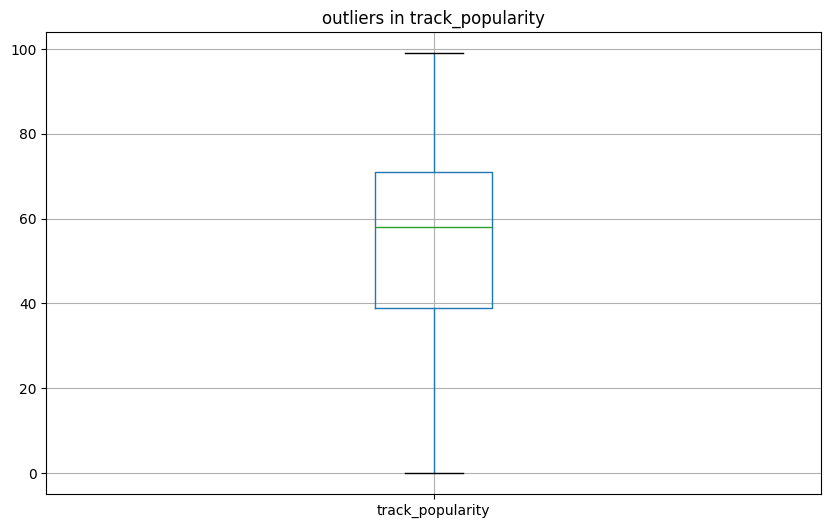

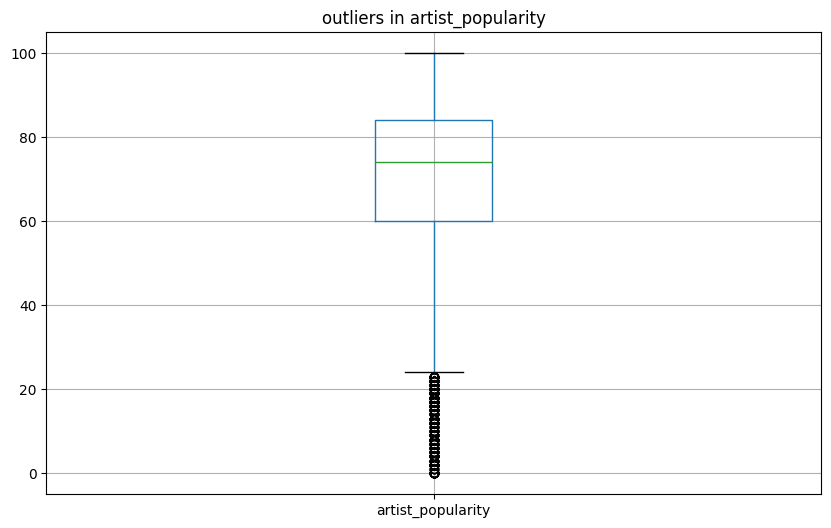

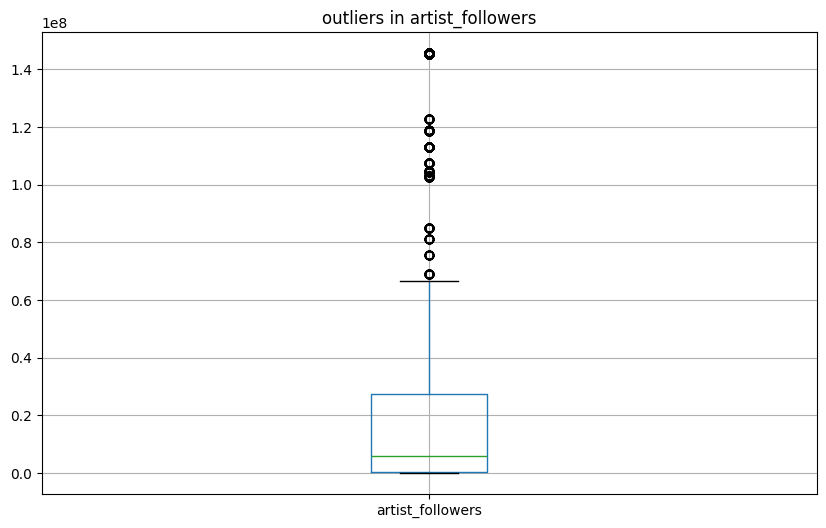

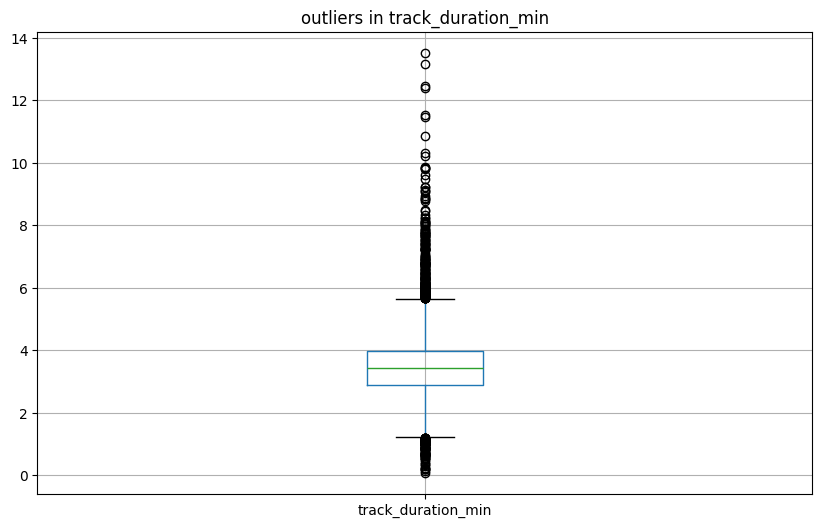

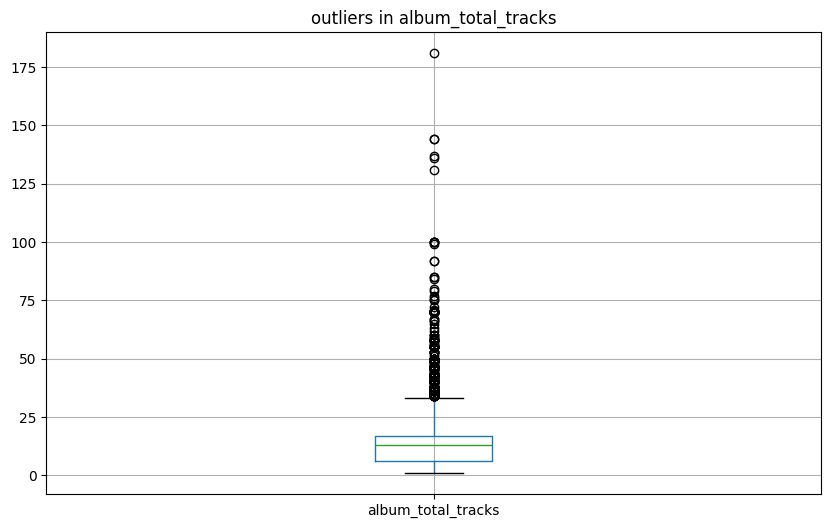

In [ ]:
# cek outliers
numerical_cols = ['track_popularity', 'artist_popularity', 'artist_followers', 
                  'track_duration_min', 'album_total_tracks']

for col in numerical_cols:
    plt.figure(figsize=(10,6))
    df.boxplot(column=col)
    plt.title(f"outliers in {col}")
    plt.show()

In [71]:
# log transfrom  artsit followers ( very skewed )
df_clean['artist_followers_log'] = np.log1p(df_clean['artist_followers'])

# clip track duration min (remove long duration)
df_clean['track_duration_min'] = df_clean['track_duration_min'].clip(upper=10)

# clip album total track ( remove compilation albums)
df_clean['album_total_tracks'] = df_clean['album_total_tracks'].clip(upper=30)

